In [1]:
%run requirements.ipynb
%run config.ipynb
%run module_preprocess.ipynb
%run module_training.ipynb
%run module_fdi_generator.ipynb
%run module_feature_extraction.ipynb

In [2]:
smart_meter_data_group = []
for i in range(10):
    d1 = pd.read_csv('CSV/smartmeterhalf/smart_meter_'+str(i)+'_1.csv')
    d2 = pd.read_csv('CSV/smartmeterhalf/smart_meter_'+str(i)+'_2.csv')
    data = pd.concat([d1,d2])
    print(data.shape)
    smart_meter_data_group.append(data)

(10735680, 8)
(10735680, 8)
(10735680, 8)
(10735680, 8)
(10735680, 8)
(10735680, 8)
(10735680, 8)
(10735680, 8)
(10735680, 8)
(10862880, 8)


In [3]:
for f in smart_meter_data_group:
    print(f.shape, f[ f['FDI_method'] != 0 ]['FDI'].count())
    print(f.shape, f[ f['FDI'] == True ]['FDI'].count())
    print()

(10735680, 8) 534240
(10735680, 8) 534240

(10735680, 8) 534240
(10735680, 8) 534240

(10735680, 8) 534240
(10735680, 8) 534240

(10735680, 8) 534240
(10735680, 8) 534240

(10735680, 8) 534240
(10735680, 8) 534240

(10735680, 8) 534240
(10735680, 8) 534240

(10735680, 8) 534240
(10735680, 8) 534240

(10735680, 8) 534240
(10735680, 8) 534240

(10735680, 8) 534240
(10735680, 8) 534240

(10862880, 8) 534240
(10862880, 8) 534240



### start

In [25]:
# if daily == True: X.reshape(-1, 48)
# if daily == False: X.reshape(-1, 530, 48)  ## default

def get_no_ntl(daily=False):
    X_list = []
    pbar = tqdm(smart_meter_data_group)
    count = 1
    for area in pbar: # iterate 10 data groups
#         print(f'start {count}')
        X = []
        for meter_index in range(int(area.shape[0]/530/48)): # iterate every fdi meter in area 
            meter_offset = meter_index * 530 * 48
            meter = area[meter_offset: meter_offset + 530 * 48]
            for i in range(530):
                if any(meter[i*48:(i+1)*48]['FDI']):
                    fdi_count += 1
                    continue
                X.append(meter["Atk_Elec"][i*48:(i+1)*48].to_numpy())
        X = np.array(X)
        if daily:
            X = X.reshape(-1, 48)
        else:
            X = X.reshape(-1, 530, 48)
        X_list.append(X)
        count = count + 1
        break
    return X_list
def get_only_ntl(daily=False):
    X_list = []
    pbar = tqdm(smart_meter_data_group)
    count = 1
    for area in pbar: # iterate 10 data groups
#         print(f'start {count}')
        X = []
        for meter_index in range(int(area.shape[0]/530/48)): # iterate every fdi meter in area 
            meter_offset = meter_index * 530 * 48
            meter = area[meter_offset: meter_offset + 530 * 48]
            for i in range(530):
                if not any(meter[i*48:(i+1)*48]['FDI']):

                    continue
                X.append(meter["Atk_Elec"][i*48:(i+1)*48].to_numpy())
        X = np.array(X)
        if daily:
            X = X.reshape(-1, 48)
        else:
            X = X.reshape(-1, 530, 48)
        X_list.append(X)
        count = count + 1
    return X_list
def get_all(daily=False):
    X_list = []
    pbar = tqdm(smart_meter_data_group)
    count = 1
    for area in pbar: # iterate 10 data groups
#         print(f'start {count}')
        X = area['Atk_Elec'].to_numpy()
        if daily:
            X = X.reshape(-1, 48)
        else:
            X = X.reshape(-1, 530, 48)
        X_list.append(X)
        count = count + 1
    return X_list

In [26]:
X_list = get_all(daily=True)


  0%|          | 0/10 [00:00<?, ?it/s]

(223660, 48)

In [27]:
for i in X_list:
    print(i.shape)

(223660, 48)
(223660, 48)
(223660, 48)
(223660, 48)
(223660, 48)
(223660, 48)
(223660, 48)
(223660, 48)
(223660, 48)
(226310, 48)


In [24]:
X_list = get_all(daily=True)
X_list[0].shape

  0%|          | 0/10 [00:00<?, ?it/s]

(11130, 48)

In [20]:
for i in X_list:
    print(i.shape)
    if 1 in i.reshape(-1):
        print('have 0')
    break

(212530, 48)
have 0


In [ ]:
"""
calculate dba 48 & 530, sdtw 48 & 530
check ntl affect
silhouette
cluster it
"""

# euclidean

## eu, -1 * 530 * 48

In [123]:
# 530 * 48 all
one_cluster_eu_barycenter_48 = []
X_list = get_all()
pbar = tqdm(X_list)
for X in pbar:
    result = euclidean_barycenter(X)
    one_cluster_eu_barycenter_48.append(result)
print(one_cluster_eu_barycenter_48[0].shape)

# 530 * 48 no ntl
one_cluster_eu_barycenter_48_no_ntl = []
X_list = get_no_ntl()
pbar = tqdm(X_list)
for X in pbar:
    result = euclidean_barycenter(X)
    one_cluster_eu_barycenter_48_no_ntl.append(result)
print(one_cluster_eu_barycenter_48_no_ntl[0].shape)

# 530 * 48 only ntl
one_cluster_eu_barycenter_48_only_ntl = []
X_list = get_only_ntl()
pbar = tqdm(X_list)
for X in pbar:
    result = euclidean_barycenter(X)
    one_cluster_eu_barycenter_48_only_ntl.append(result)
print(one_cluster_eu_barycenter_48_only_ntl[0].shape)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

(530, 48)


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

(530, 48)


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

(530, 48)


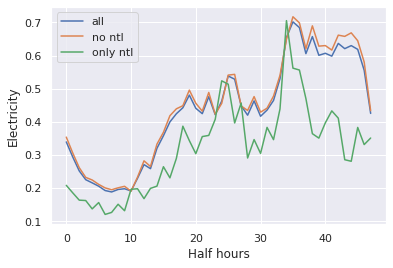

In [129]:
# sdtw area 0
plt.plot(one_cluster_eu_barycenter_48[0][0], label="all")
plt.plot(one_cluster_eu_barycenter_48_no_ntl[0][0], label="no ntl")
plt.plot(one_cluster_eu_barycenter_48_only_ntl[0][0], label="only ntl")
plt.legend(loc="upper left")
plt.xlabel("Half hours")
plt.ylabel("Electricity")
plt.savefig("eucldean barycenter 530*48 1 day in area 0")

## eu, -1 * 48

In [125]:
# 530 * 48 all
one_cluster_eu_barycenter = []
X_list = get_all(daily=True)
pbar = tqdm(X_list)
for X in pbar:
    result = euclidean_barycenter(X)
    one_cluster_eu_barycenter.append(result)
print(one_cluster_eu_barycenter[0].shape)

# 530 * 48 no ntl
one_cluster_eu_barycenter_no_ntl = []
X_list = get_no_ntl(daily=True)
pbar = tqdm(X_list)
for X in pbar:
    result = euclidean_barycenter(X)
    one_cluster_eu_barycenter_no_ntl.append(result)
print(one_cluster_eu_barycenter_no_ntl[0].shape)

# 530 * 48 only ntl
one_cluster_eu_barycenter_only_ntl = []
X_list = get_only_ntl(daily=True)
pbar = tqdm(X_list)
for X in pbar:
    result = euclidean_barycenter(X)
    one_cluster_eu_barycenter_only_ntl.append(result)
print(one_cluster_eu_barycenter_only_ntl[0].shape)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

(48, 1)


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

(48, 1)


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

(48, 1)


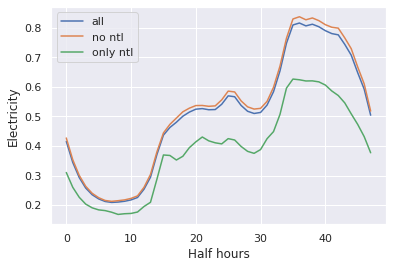

In [128]:
# sdtw area 0
plt.plot(one_cluster_eu_barycenter[0], label="all")
plt.plot(one_cluster_eu_barycenter_no_ntl[0], label="no ntl")
plt.plot(one_cluster_eu_barycenter_only_ntl[0], label="only ntl")
plt.legend(loc="upper left")
plt.xlabel("Half hours")
plt.ylabel("Electricity")
plt.savefig("euclidean barycenter -1*48 1 day in area 0")

# dba

## dba, -1 * 530 * 48

In [10]:
# 530 * 48 all
one_cluster_dba_barycenter_48 = []
pbar = tqdm(X_list)
for X in pbar:
    result = dtw_barycenter_averaging_subgradient(X, max_iter=20, tol=1e-3)
    one_cluster_dba_barycenter_48.append(result)
print(one_cluster_dba_barycenter_48[0].shape)

  0%|          | 0/10 [00:00<?, ?it/s]

(530, 48)


In [16]:
# 530 * 48 no ntl
one_cluster_dba_barycenter_48_no_ntl = []
X_list = get_no_ntl()
pbar = tqdm(X_list)
for X in pbar:
    result = dtw_barycenter_averaging_subgradient(X, max_iter=20, tol=1e-3)
    one_cluster_dba_barycenter_48_no_ntl.append(result)
print(one_cluster_dba_barycenter_48_no_ntl[0].shape)

  0%|          | 0/10 [00:00<?, ?it/s]

start 1
start 2
start 3
start 4
start 5
start 6
start 7
start 8
start 9
start 10


  0%|          | 0/10 [00:00<?, ?it/s]

(530, 48)


In [17]:
# 530 * 48 only ntl
one_cluster_dba_barycenter_48_only_ntl = []
X_list = get_only_ntl()
pbar = tqdm(X_list)
for X in pbar:
    result = dtw_barycenter_averaging_subgradient(X, max_iter=20, tol=1e-3)
    one_cluster_dba_barycenter_48_only_ntl.append(result)
print(one_cluster_dba_barycenter_48_only_ntl[0].shape)

  0%|          | 0/10 [00:00<?, ?it/s]

start 1
start 2
start 3
start 4
start 5
start 6
start 7
start 8
start 9
start 10


  0%|          | 0/10 [00:00<?, ?it/s]

(530, 48)


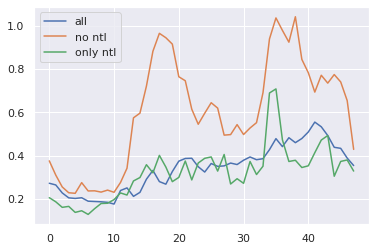

In [19]:
# dba area 0
plt.plot(one_cluster_dba_barycenter_48[0][0], label="all")
plt.plot(one_cluster_dba_barycenter_48_no_ntl[0][0], label="no ntl")
plt.plot(one_cluster_dba_barycenter_48_only_ntl[0][0], label="only ntl")
plt.legend(loc="upper left")

## dba, -1 * 48

In [24]:
# 530 * 48 all
one_cluster_dba_barycenter = []
X_list = get_all(daily=True)
pbar = tqdm(X_list)
for X in pbar:
    result = dtw_barycenter_averaging_subgradient(X, max_iter=20, tol=1e-3)
    one_cluster_dba_barycenter.append(result)
print(one_cluster_dba_barycenter[0].shape)

# 530 * 48 no ntl
one_cluster_dba_barycenter_no_ntl = []
X_list = get_no_ntl(daily=True)
pbar = tqdm(X_list)
for X in pbar:
    result = dtw_barycenter_averaging_subgradient(X, max_iter=20, tol=1e-3)
    one_cluster_dba_barycenter_no_ntl.append(result)
print(one_cluster_dba_barycenter_no_ntl[0].shape)

# 530 * 48 only ntl
one_cluster_dba_barycenter_only_ntl = []
X_list = get_only_ntl(daily=True)
pbar = tqdm(X_list)
for X in pbar:
    result = dtw_barycenter_averaging_subgradient(X, max_iter=20, tol=1e-3)
    one_cluster_dba_barycenter_only_ntl.append(result)
print(one_cluster_dba_barycenter_only_ntl[0].shape)

  0%|          | 0/10 [00:00<?, ?it/s]

start 1
start 2
start 3
start 4
start 5
start 6
start 7
start 8
start 9
start 10


  0%|          | 0/10 [00:00<?, ?it/s]

(48, 1)


  0%|          | 0/10 [00:00<?, ?it/s]

start 1
start 2
start 3
start 4
start 5
start 6
start 7
start 8
start 9
start 10


  0%|          | 0/10 [00:00<?, ?it/s]

(48, 1)


  0%|          | 0/10 [00:00<?, ?it/s]

start 1
start 2
start 3
start 4
start 5
start 6
start 7
start 8
start 9
start 10


  0%|          | 0/10 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/tslearn/barycenters/dba.py:736: ConvergenceWarning: DBA loss is increasing while it should not be. Stopping optimization.
  "Stopping optimization.", ConvergenceWarning)


(48, 1)


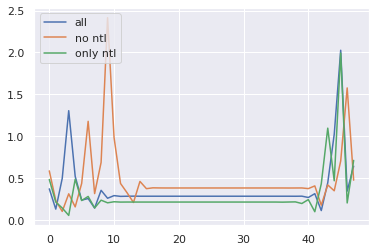

In [25]:
# dba area 0
plt.plot(one_cluster_dba_barycenter[0], label="all")
plt.plot(one_cluster_dba_barycenter_no_ntl[0], label="no ntl")
plt.plot(one_cluster_dba_barycenter_only_ntl[0], label="only ntl")
plt.legend(loc="upper left")

# sdtw

## sdtw, -1 * 530 * 48

In [28]:
# 530 * 48 all
one_cluster_sdtw_barycenter_48 = []
X_list = get_all()
pbar = tqdm(X_list)
for X in pbar:
    result = softdtw_barycenter(X, max_iter=20, tol=1e-3)
    one_cluster_sdtw_barycenter_48.append(result)
print(one_cluster_sdtw_barycenter_48[0].shape)

# 530 * 48 no ntl
one_cluster_sdtw_barycenter_48_no_ntl = []
X_list = get_no_ntl()
pbar = tqdm(X_list)
for X in pbar:
    result = softdtw_barycenter(X, max_iter=20, tol=1e-3)
    one_cluster_sdtw_barycenter_48_no_ntl.append(result)
print(one_cluster_sdtw_barycenter_48_no_ntl[0].shape)

# 530 * 48 only ntl
one_cluster_sdtw_barycenter_48_only_ntl = []
X_list = get_only_ntl()
pbar = tqdm(X_list)
for X in pbar:
    result = softdtw_barycenter(X, max_iter=20, tol=1e-3)
    one_cluster_sdtw_barycenter_48_only_ntl.append(result)
print(one_cluster_sdtw_barycenter_48_only_ntl[0].shape)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

(530, 48)


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

(530, 48)


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

(530, 48)


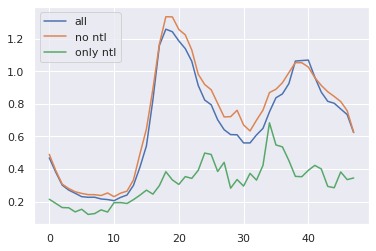

In [34]:
# sdtw area 0
plt.plot(one_cluster_sdtw_barycenter_48[0][0], label="all")
plt.plot(one_cluster_sdtw_barycenter_48_no_ntl[0][0], label="no ntl")
plt.plot(one_cluster_sdtw_barycenter_48_only_ntl[0][0], label="only ntl")
plt.legend(loc="upper left")

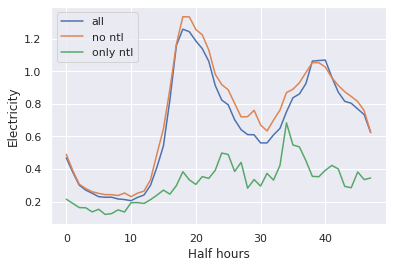

In [112]:
plt.plot(one_cluster_sdtw_barycenter_48[0][0], label="all")
plt.plot(one_cluster_sdtw_barycenter_48_no_ntl[0][0], label="no ntl")
plt.plot(one_cluster_sdtw_barycenter_48_only_ntl[0][0], label="only ntl")
plt.legend(loc="upper left")
plt.xlabel("Half hours")
plt.ylabel("Electricity")
plt.savefig("sdtw barycenter 530*48 1 day in area 0")

In [53]:
print(len(X_list))
print(len(X_list[0]))
print(len(X_list[0][0]))
print(len(X_list[0][0][0]))

10
422
530
48


In [54]:
print(len(one_cluster_sdtw_barycenter_48))
print(len(one_cluster_sdtw_barycenter_48[0]))
print(len(one_cluster_sdtw_barycenter_48[0][0]))

10
530
48


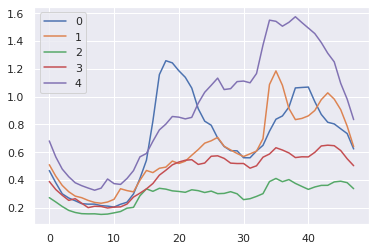

In [116]:
continous = np.empty(0)
continous_no_ntl = np.empty(0)
continous_only_ntl = np.empty(0)
for i in range(5): #前五天
    plt.plot(one_cluster_sdtw_barycenter_48[0][i], label=i)
    continous = np.append(continous, one_cluster_sdtw_barycenter_48[0][i][0:48])
    continous_no_ntl = np.append(continous_no_ntl, one_cluster_sdtw_barycenter_48_no_ntl[0][i][0:48])
    continous_only_ntl = np.append(continous_only_ntl, one_cluster_sdtw_barycenter_48_only_ntl[0][i][0:48])
    plt.legend(loc="upper left")

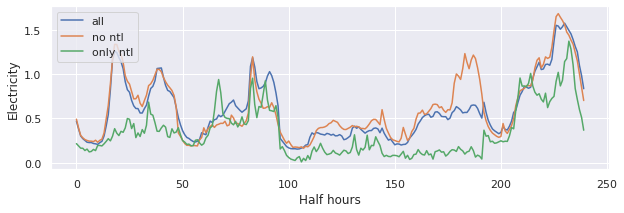

In [117]:
# sdtw area 0
plt.figure(figsize=(10,3))
plt.plot(continous, label="all")
plt.plot(continous_no_ntl, label="no ntl")
plt.plot(continous_only_ntl, label="only ntl")
plt.legend(loc="upper left")
plt.xlabel("Half hours")
plt.ylabel("Electricity")
plt.savefig("sdtw barycenter 530*48 5 day in area 0")

## sdtw, -1 * 48

In [32]:
# 530 * 48 all
one_cluster_sdtw_barycenter = []
X_list = get_all(daily=True)
pbar = tqdm(X_list)
for X in pbar:
    result = softdtw_barycenter(X, max_iter=20, tol=1e-3)
    one_cluster_sdtw_barycenter.append(result)
print(one_cluster_sdtw_barycenter[0].shape)

# 530 * 48 no ntl
one_cluster_sdtw_barycenter_no_ntl = []
X_list = get_no_ntl(daily=True)
pbar = tqdm(X_list)
for X in pbar:
    result = softdtw_barycenter(X, max_iter=20, tol=1e-3)
    one_cluster_sdtw_barycenter_no_ntl.append(result)
print(one_cluster_sdtw_barycenter_no_ntl[0].shape)

# 530 * 48 only ntl
one_cluster_sdtw_barycenter_only_ntl = []
X_list = get_only_ntl(daily=True)
pbar = tqdm(X_list)
for X in pbar:
    result = softdtw_barycenter(X, max_iter=20, tol=1e-3)
    one_cluster_sdtw_barycenter_only_ntl.append(result)
print(one_cluster_sdtw_barycenter_only_ntl[0].shape)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

(48, 1)


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

(48, 1)


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

(48, 1)


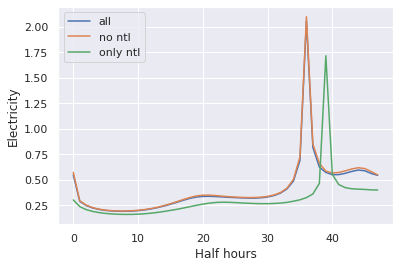

In [118]:
# sdtw area 0
plt.plot(one_cluster_sdtw_barycenter[0], label="all")
plt.plot(one_cluster_sdtw_barycenter_no_ntl[0], label="no ntl")
plt.plot(one_cluster_sdtw_barycenter_only_ntl[0], label="only ntl")
plt.legend(loc="upper left")
plt.xlabel("Half hours")
plt.ylabel("Electricity")
plt.savefig("sdtw barycenter -1*48 1 day in area 0")

In [55]:
print(len(one_cluster_sdtw_barycenter))
print(len(one_cluster_sdtw_barycenter[0]))
print(len(one_cluster_sdtw_barycenter[0][0]))

10
48
1


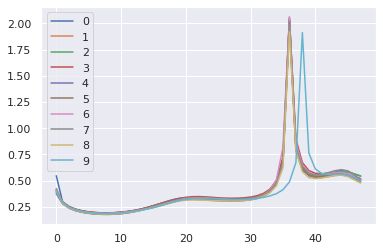

In [121]:
continous = np.empty(0)
continous_no_ntl = np.empty(0)
continous_only_ntl = np.empty(0)
for i in range(10): #前五天
    plt.plot(one_cluster_sdtw_barycenter[i], label=i)
    continous = np.append(continous, one_cluster_sdtw_barycenter[i][0:48])
    continous_no_ntl = np.append(continous_no_ntl, one_cluster_sdtw_barycenter_no_ntl[i][0:48])
    continous_only_ntl = np.append(continous_only_ntl, one_cluster_sdtw_barycenter_only_ntl[i][0:48])
    plt.legend(loc="upper left")

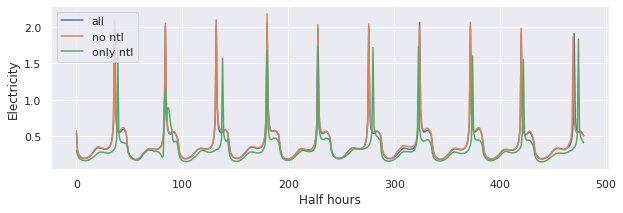

In [122]:
# sdtw area 0
plt.figure(figsize=(10,3))
plt.plot(continous, label="all")
plt.plot(continous_no_ntl, label="no ntl")
plt.plot(continous_only_ntl, label="only ntl")
plt.legend(loc="upper left")
plt.xlabel("Half hours")
plt.ylabel("Electricity")
plt.savefig("sdtw barycenter -1*48 10 day in area 0")

# save results

## 530 * 48

In [130]:
#euclidean
df = pd.DataFrame(np.array(one_cluster_eu_barycenter_48).reshape(10, 530*48))
df.shape
e = df.to_csv(index=False)
f = open('one_cluster_eu_barycenter_48.csv','w')
f.write(e) #Give your csv text here.
f.close()

df = pd.DataFrame(np.array(one_cluster_eu_barycenter_48_no_ntl).reshape(10, 530*48))
df.shape
e = df.to_csv(index=False)
f = open('one_cluster_eu_barycenter_48_no_ntl.csv','w')
f.write(e) #Give your csv text here.
f.close()

df = pd.DataFrame(np.array(one_cluster_eu_barycenter_48_only_ntl).reshape(10, 530*48))
df.shape
e = df.to_csv(index=False)
f = open('one_cluster_eu_barycenter_48_only_ntl.csv','w')
f.write(e) #Give your csv text here.
f.close()

In [30]:
#dba
df = pd.DataFrame(np.array(one_cluster_dba_barycenter_48).reshape(10, 530*48))
df.shape
e = df.to_csv(index=False)
f = open('one_cluster_dba_barycenter_48.csv','w')
f.write(e) #Give your csv text here.
f.close()

df = pd.DataFrame(np.array(one_cluster_dba_barycenter_48_no_ntl).reshape(10, 530*48))
df.shape
e = df.to_csv(index=False)
f = open('one_cluster_dba_barycenter_48_no_ntl.csv','w')
f.write(e) #Give your csv text here.
f.close()

df = pd.DataFrame(np.array(one_cluster_dba_barycenter_48_only_ntl).reshape(10, 530*48))
df.shape
e = df.to_csv(index=False)
f = open('one_cluster_dba_barycenter_48_only_ntl.csv','w')
f.write(e) #Give your csv text here.
f.close()

In [31]:
#sdtw
df = pd.DataFrame(np.array(one_cluster_sdtw_barycenter_48).reshape(10, 530*48))
df.shape
e = df.to_csv(index=False)
f = open('one_cluster_sdtw_barycenter_48.csv','w')
f.write(e) #Give your csv text here.
f.close()

df = pd.DataFrame(np.array(one_cluster_sdtw_barycenter_48_no_ntl).reshape(10, 530*48))
df.shape
e = df.to_csv(index=False)
f = open('one_cluster_sdtw_barycenter_48_no_ntl.csv','w')
f.write(e) #Give your csv text here.
f.close()

df = pd.DataFrame(np.array(one_cluster_sdtw_barycenter_48_only_ntl).reshape(10, 530*48))
df.shape
e = df.to_csv(index=False)
f = open('one_cluster_sdtw_barycenter_48_only_ntl.csv','w')
f.write(e) #Give your csv text here.
f.close()

## -1 * 48

In [137]:
#euclidean
df = pd.DataFrame(np.array(one_cluster_eu_barycenter).reshape(10,48))
df.shape
e = df.to_csv(index=False)
f = open('one_cluster_eu_barycenter.csv','w')
f.write(e) #Give your csv text here.
f.close()

df = pd.DataFrame(np.array(one_cluster_eu_barycenter_no_ntl).reshape(10, 48))
df.shape
e = df.to_csv(index=False)
f = open('one_cluster_eu_barycenter_no_ntl.csv','w')
f.write(e) #Give your csv text here.
f.close()

df = pd.DataFrame(np.array(one_cluster_eu_barycenter_only_ntl).reshape(10, 48))
df.shape
e = df.to_csv(index=False)
f = open('one_cluster_eu_barycenter_only_ntl.csv','w')
f.write(e) #Give your csv text here.
f.close()

In [140]:
#dba
df = pd.DataFrame(np.array(one_cluster_dba_barycenter).reshape(10, 48))
df.shape
e = df.to_csv(index=False)
f = open('one_cluster_dba_barycenter.csv','w')
f.write(e) #Give your csv text here.
f.close()

df = pd.DataFrame(np.array(one_cluster_dba_barycenter_no_ntl).reshape(10, 48))
df.shape
e = df.to_csv(index=False)
f = open('one_cluster_dba_barycenter_no_ntl.csv','w')
f.write(e) #Give your csv text here.
f.close()

df = pd.DataFrame(np.array(one_cluster_dba_barycenter_only_ntl).reshape(10, 48))
df.shape
e = df.to_csv(index=False)
f = open('one_cluster_dba_barycenter_only_ntl.csv','w')
f.write(e) #Give your csv text here.
f.close()

In [141]:
#sdtw
df = pd.DataFrame(np.array(one_cluster_sdtw_barycenter).reshape(10, 48))
df.shape
e = df.to_csv(index=False)
f = open('one_cluster_sdtw_barycenter.csv','w')
f.write(e) #Give your csv text here.
f.close()

df = pd.DataFrame(np.array(one_cluster_sdtw_barycenter_no_ntl).reshape(10, 48))
df.shape
e = df.to_csv(index=False)
f = open('one_cluster_sdtw_barycenter_no_ntl.csv','w')
f.write(e) #Give your csv text here.
f.close()

df = pd.DataFrame(np.array(one_cluster_sdtw_barycenter_only_ntl).reshape(10, 48))
df.shape
e = df.to_csv(index=False)
f = open('one_cluster_sdtw_barycenter_only_ntl.csv','w')
f.write(e) #Give your csv text here.
f.close()